### cluster algorithm

### k-means algorithm
K-Means is a centroid-based algorithm that partitions the data into K clusters. In this case, we are setting n_clusters=2, meaning we expect the algorithm to find two clusters.

K-means yeh shape bhi correctly identify nahi kar pata, kyunki K-means sirf straight lines ya simple circular clusters pe kaam karta hai.

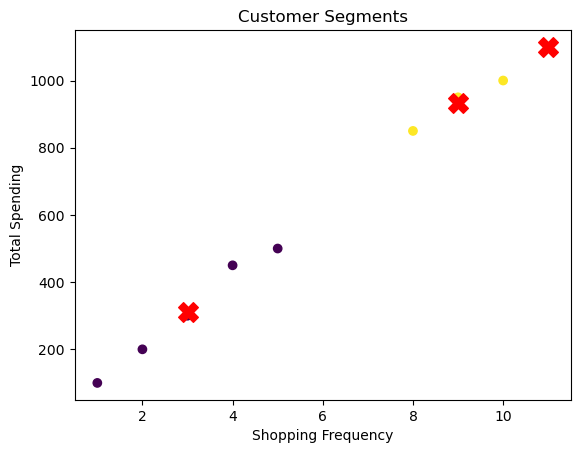

Customer 0 is in cluster 0
Customer 1 is in cluster 0
Customer 2 is in cluster 0
Customer 3 is in cluster 0
Customer 4 is in cluster 0
Customer 5 is in cluster 2
Customer 6 is in cluster 2
Customer 7 is in cluster 1
Customer 8 is in cluster 2


In [2]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 2: Sample data (Frequency vs Spending)
X = np.array([
    [5, 500],
    [1, 100],
    [4, 450],
    [2, 200],
    [3, 300],
    [10, 1000],
    [9, 950],
    [11, 1100],
    [8, 850]
])

# Step 3: Create KMeans model
kmeans = KMeans(n_clusters=3, random_state=0)

# Step 4: Train model
kmeans.fit(X)

# Step 5: Predictions (har customer ka cluster label)
labels = kmeans.labels_

# Step 6: Cluster Centers
centers = kmeans.cluster_centers_

# Step 7: Plotting the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')  # Customers points
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200)  # Cluster centers
plt.xlabel('Shopping Frequency')
plt.ylabel('Total Spending')
plt.title('Customer Segments')
plt.show()

# Extra: Print cluster assignments
for i, label in enumerate(labels):
    print(f"Customer {i} is in cluster {label}")


## DBSCAN
Spam/Fake customers detect

What is eps?
eps (epsilon) means the maximum distance allowed between two points so that they are considered neighbors (part of the same cluster).

min_samples means the minimum number of points needed to form a cluster.

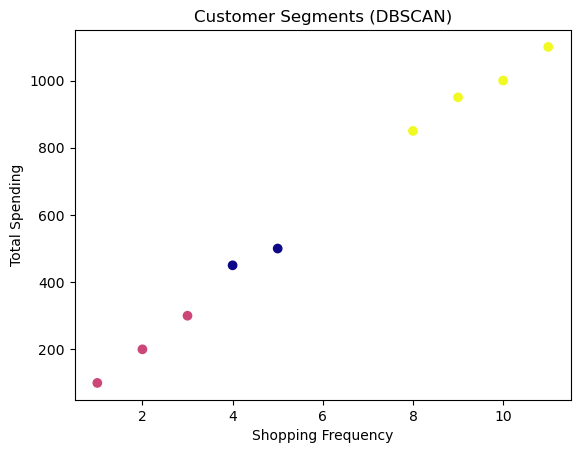

Customer 0 is in cluster 0
Customer 1 is in cluster 1
Customer 2 is in cluster 0
Customer 3 is in cluster 1
Customer 4 is in cluster 1
Customer 5 is in cluster 2
Customer 6 is in cluster 2
Customer 7 is in cluster 2
Customer 8 is in cluster 2


In [ ]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

X = np.array([
    [5, 500],
    [1, 100],
    [4, 450],
    [2, 200],
    [3, 300],
    [10, 1000],
    [9, 950],
    [11, 1100],
    [8, 850]
])

dbscan = DBSCAN(eps=150, min_samples=2)

dbscan.fit(X)

labels = dbscan.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')  
plt.xlabel('Shopping Frequency')
plt.ylabel('Total Spending')
plt.title('Customer Segments (DBSCAN)')
plt.show()

for i, label in enumerate(labels):
    print(f"Customer {i} is in cluster {label}")


### Hierarchical
Jab humko data ka "natural grouping" aur "relationship tree" banana ho, tab Hierarchical Clustering best hoti hai.

### use cases
Do Targeted Marketing:
Send premium offers to the high spenders.
Send discount offers to the low spenders.


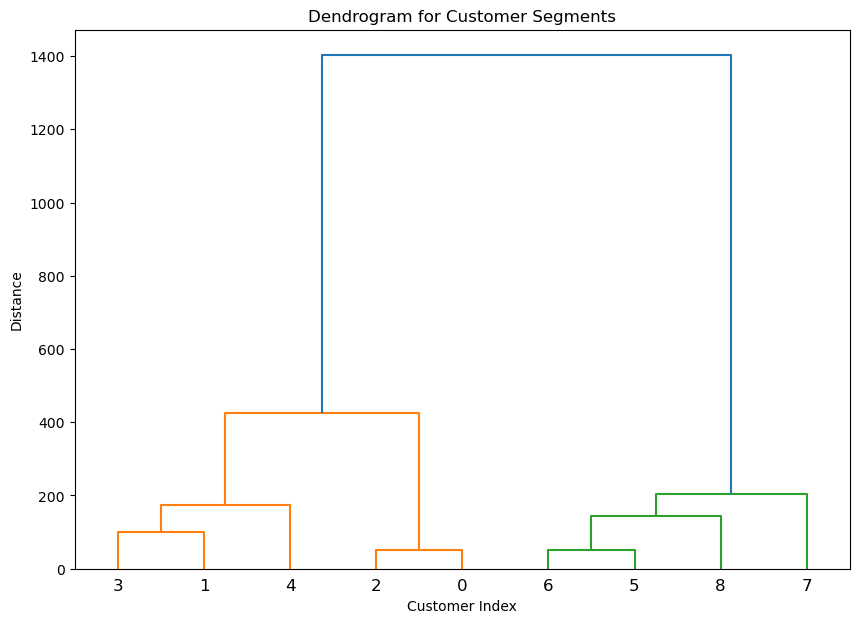

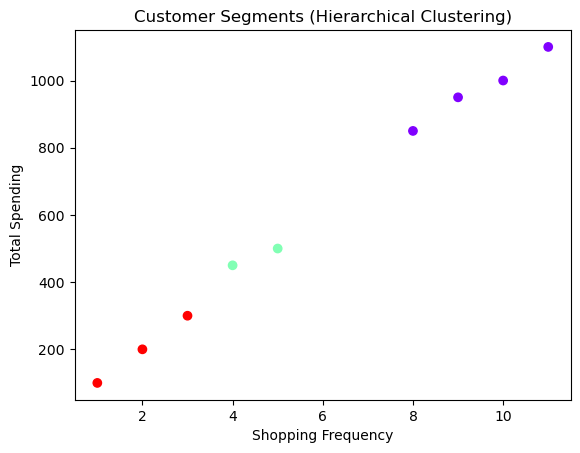

Customer 0 is in cluster 2
Customer 1 is in cluster 3
Customer 2 is in cluster 2
Customer 3 is in cluster 3
Customer 4 is in cluster 3
Customer 5 is in cluster 1
Customer 6 is in cluster 1
Customer 7 is in cluster 1
Customer 8 is in cluster 1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

X = np.array([
    [5, 500],
    [1, 100],
    [4, 450],
    [2, 200],
    [3, 300],
    [10, 1000],
    [9, 950],
    [11, 1100],
    [8, 850]
])

# method='ward' matlab minimum variance ke basis par grouping ho rahi hai (standard method).
linked = linkage(X, method='ward')

# Step 4: Plot dendrogram (tree structure)
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Customer Segments')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

# Step 5: Form clusters
labels = fcluster(linked, 3, criterion='maxclust')
#3 clusters chahiye isliye 3 diya.
#criterion='maxclust' matlab maximum 3 clusters.

# Step 6: Plotting the clustered data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.xlabel('Shopping Frequency')
plt.ylabel('Total Spending')
plt.title('Customer Segments (Hierarchical Clustering)')
plt.show()

# Extra: Print cluster assignments
for i, label in enumerate(labels):
    print(f"Customer {i} is in cluster {label}")


### Spectral Clustering
Spectral Clustering can handle these shapes because it works based on graph theory and uses eigenvectors to identify clusters based on proximity and relationships, rather than strict geometry.

/home/jigar/PREFIX=/Users/jigar/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


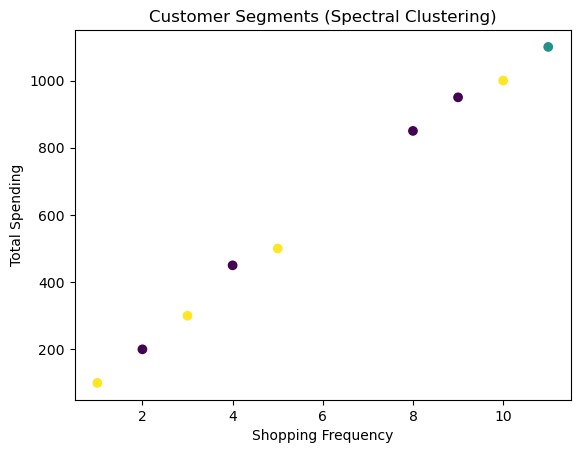

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering

# Input data
X = np.array([
    [5, 500],
    [1, 100],
    [4, 450],
    [2, 200],
    [3, 300],
    [10, 1000],
    [9, 950],
    [11, 1100],
    [8, 850]
])

# Spectral Clustering with rbf affinity
spectral = SpectralClustering(
    n_clusters=3,     
    affinity='rbf',   # affinity='rbf': 'rbf' (Radial Basis Function) 
    assign_labels='kmeans',  # Labels are assigned using KMeans
    random_state=0
)

# Step 4: Train model and predict labels
labels = spectral.fit_predict(X)

# Step 5: Plotting the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')  
plt.xlabel('Shopping Frequency')
plt.ylabel('Total Spending')
plt.title('Customer Segments (Spectral Clustering)')
plt.show()
